# Whatsapp Chat Analysis

In [1]:
#!pip install emoji

In [2]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

The dataset we are using here requires a lot of preparation, so I suggest you take a look at the data you are using before starting this WhatsApp chat analysis task. As I have already walked through the dataset, so I’ll start by writing a few Python functions to prepare the data before importing it:

In [3]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

Now let’s import the data and prepare it in a way that we can use it in a pandas DataFrame:

In [4]:
data = []
conversation = 'WhatsApp Chat with Fiza.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

Our dataset is completely ready now for the task of WhatsApp chat analysis with Python. Now let’s have a look at the last 20 messages and some other insights from the data:

In [5]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

            Date     Time  Author  \
19714 2020-04-03  9:04 PM    Fiza   
19715 2020-04-03  9:07 PM  Minhaj   
19716 2020-04-04  7:11 AM    Fiza   
19717 2020-04-04  7:11 AM    Fiza   
19718 2020-04-04  7:15 AM  Minhaj   
19719 2020-04-04  7:25 AM    Fiza   
19720 2020-04-04  7:46 AM  Minhaj   
19721 2020-04-04  7:57 AM    Fiza   
19722 2020-04-04  8:21 AM  Minhaj   
19723 2020-04-04  8:21 AM    Fiza   
19724 2020-04-04  8:21 AM    Fiza   
19725 2020-04-04  8:21 AM    Fiza   
19726 2020-04-04  8:24 AM  Minhaj   
19727 2020-04-04  8:25 AM    Fiza   
19728 2020-04-04  8:25 AM    Fiza   
19729 2020-04-04  8:25 AM    Fiza   
19730 2020-04-04  8:27 AM  Minhaj   
19731 2020-04-04  8:28 AM    Fiza   
19732 2020-04-04  8:28 AM    Fiza   
19733 2020-04-04  8:28 AM  Minhaj   

                                                 Message  
19714                                    Kazhikkandattoo  
19715                                        Thank you 😁  
19716                                        

In [6]:
df.columns

Index(['Date', 'Time', 'Author', 'Message'], dtype='object')

Now let’s have a look at the total number of messages between this WhatsApp chat:

In [7]:
total_messages = df.shape[0]
print(total_messages)

19734


Now let’s have a look at the total number of media messages present in this chat:

In [8]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

697


In [9]:
df.head(3)

,Date,Time,Author,Message
0,2020-02-04,2:55 PM,Fiza,Hyy
1,2020-02-04,2:55 PM,Fiza,Dii
2,2020-02-04,2:55 PM,Fiza,Farsuu


Now let's look who is more active

In [10]:
df.groupby('Author')['Message'].count().sort_values(ascending=False)

Author
Fiza      11636
Minhaj     8096
Name: Message, dtype: int64

Now let’s extract the URLs present in this chat and have a look at the final insights:

In [11]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats in group")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Links Shared", links)

Chats in group
Total Messages:  19734
Number of Media Shared:  697
Number of Links Shared 2


Now let’s prepare this data to get more insights to analyze all the messages sent in this chat in more detail:

In [12]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Minhaj","Fiza"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  #emojis = sum(req_df['emoji'].str.len())
  #print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Minhaj -
Messages Sent 7546
Average Words per message 2.008083752981712
Media Messages Sent 550
Links Sent 0
Stats of Fiza -
Messages Sent 11489
Average Words per message 2.5809905126642874
Media Messages Sent 147
Links Sent 0


Now let’s prepare a visualization of the total emojis present in the chat and the type of emojis sent between the two people. It will help in understanding the relationship between both the people:

Now let’s have a look at the most used words in this WhatsApp chat by visualizing a word cloud:

There are 289763 words in all the messages.


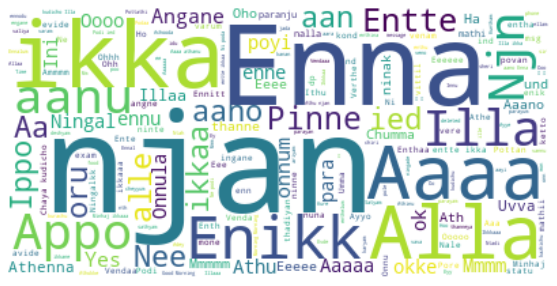

In [13]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most used words by each person by visualizing two different word clouds:

Author name Minhaj


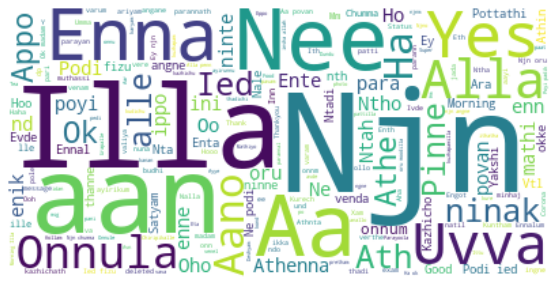

Author name Fiza


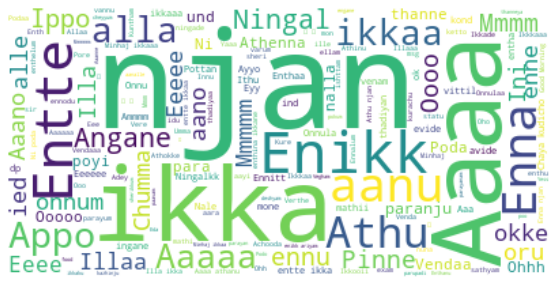

In [14]:
l = ["Minhaj", "Fiza"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

So this is how we can easily analyze any WhatsApp chat between you and your friend, customer, or even a group of people.